In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [15]:
df = pd.read_csv('fligh-data-clean.csv', index_col=0)

In [16]:
df_booked = df[df['flights booked'] > 0]

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Text(0.5, 1.0, 'Vuelos realizados por mes en 2018')

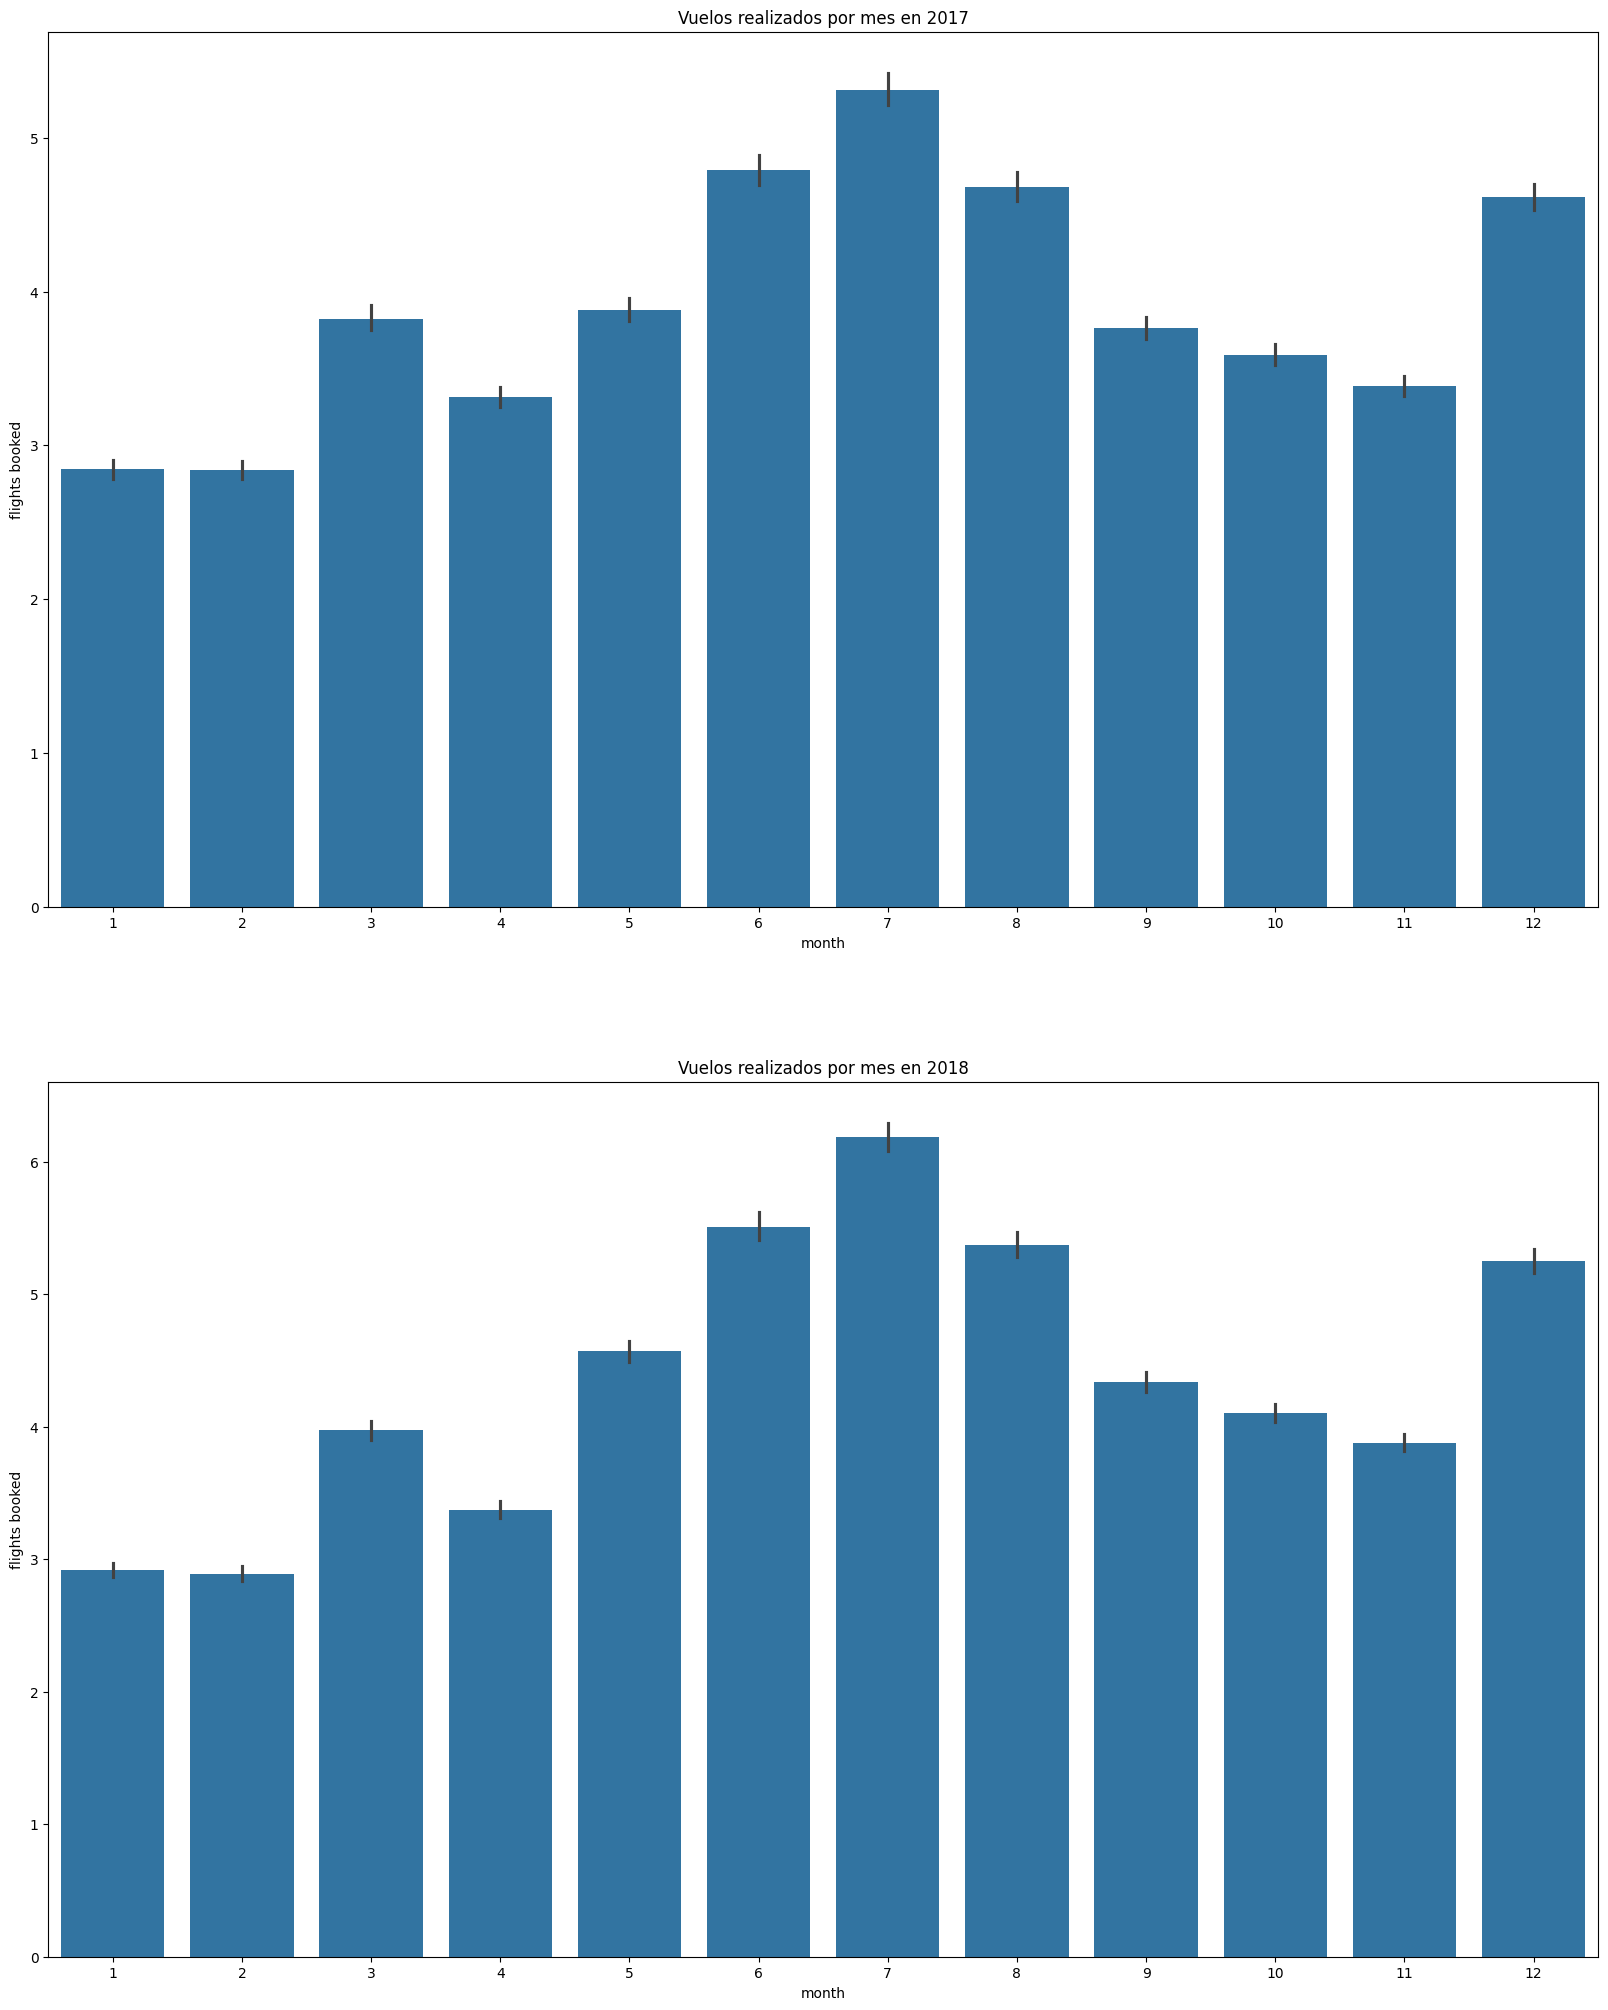

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 25))
sns.barplot(x='month',
             y='flights booked',
              data=df[df['year']==2017],
              ax=axes[0])
axes[0].set_title('Vuelos realizados por mes en 2017')

sns.barplot(x='month',
            y='flights booked',
              data=df[df['year']==2018],
              ax=axes[1])
axes[1].set_title('Vuelos realizados por mes en 2018')


> En ambos años se observan tendencias similares, con julio como el mes con más vuelos, seguido de diciembre.

- Vuelos reservados por los clientes afiliados a la aerolínea

<Axes: ylabel='flights booked'>

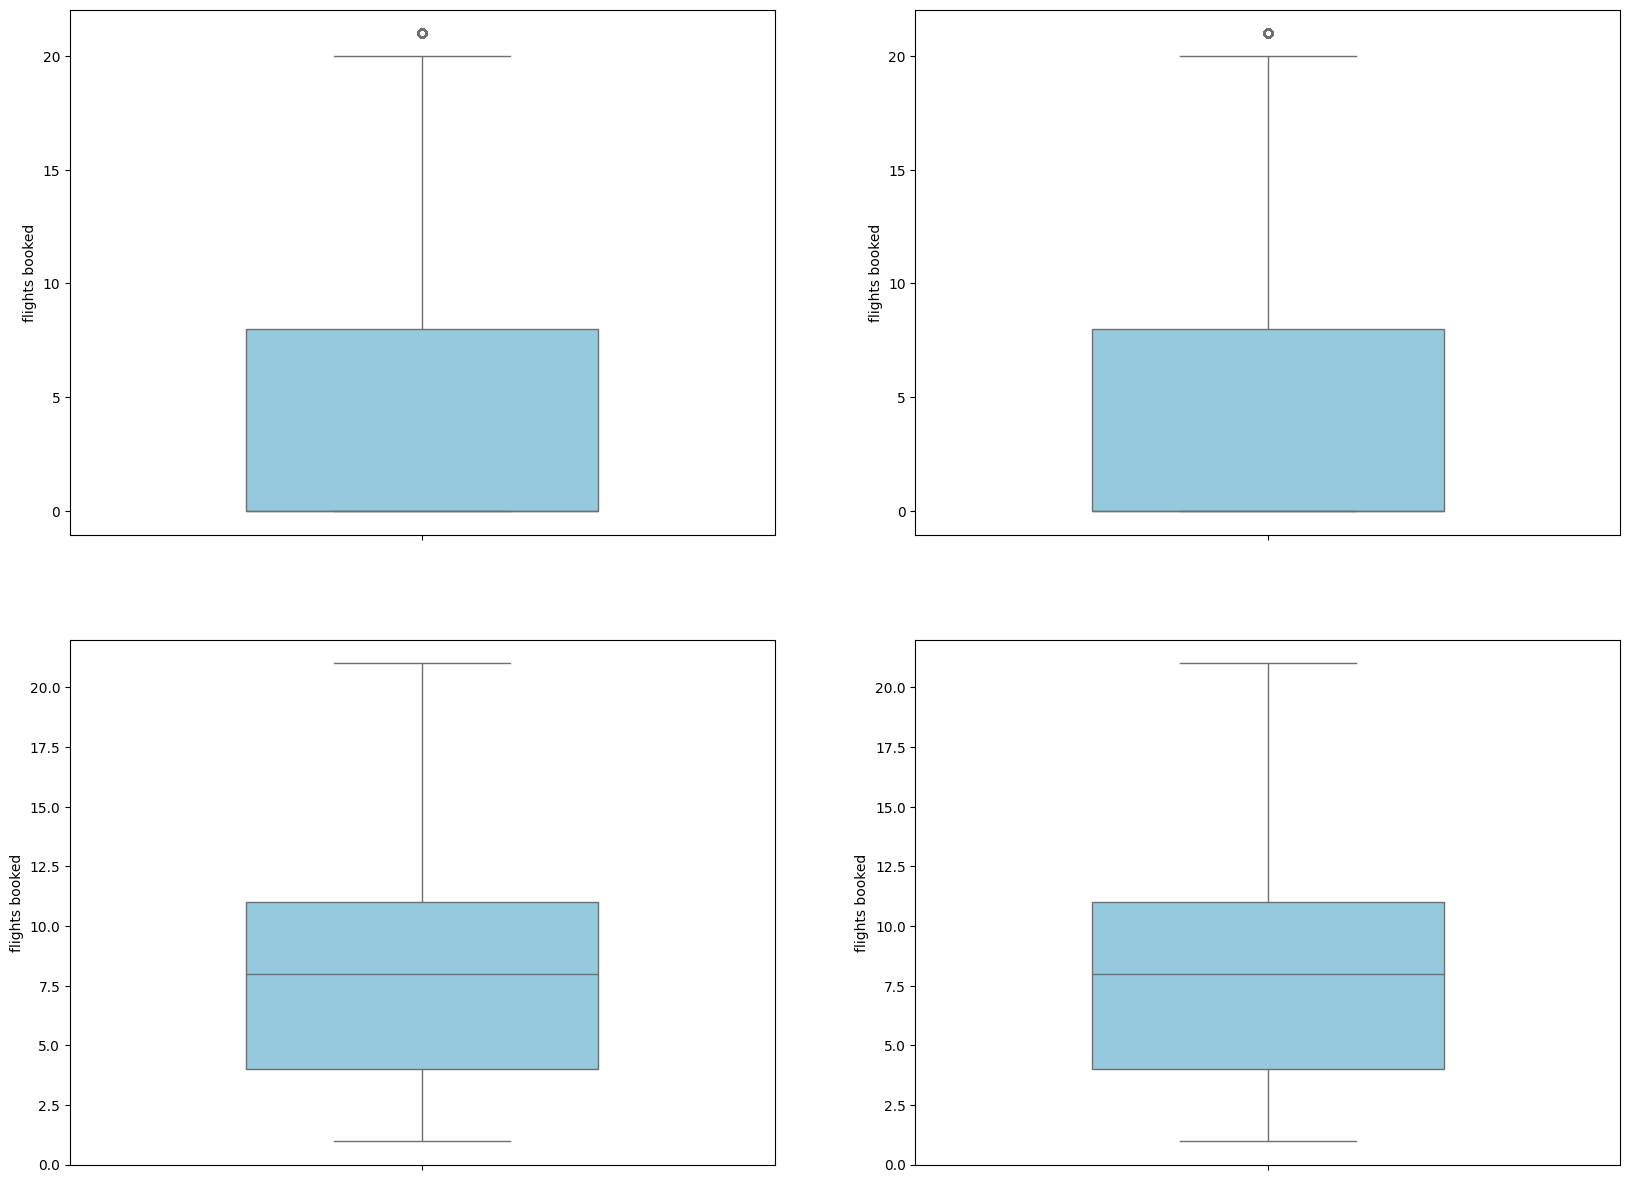

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
sns.boxplot(y = "flights booked", 
            data = df[df['year']==2017], 
            width = 0.5,
            color='skyblue',
            ax=axes[0][0])

sns.boxplot(y = "flights booked", 
            data = df[df['year']==2017], 
            width = 0.5,
            color='skyblue',
            ax=axes[0][1])

sns.boxplot(y = "flights booked", 
            data = df_booked[df_booked['year']==2017], 
            width = 0.5,
            color='skyblue',
            ax=axes[1][0])


sns.boxplot(y = "flights booked", 
            data = df_booked[df_booked['year']==2018], 
            width = 0.5,
            color='skyblue',
            ax=axes[1][1])

axes[0][0].set_tile('Vuelos ')

In [33]:
print('Media y mediana de vuelos reservados por cliente')
display(df.pivot_table(index='year', values='flights booked', aggfunc=['mean', 'median']))
print('Media y mediana de vuelos reservados:')
display(df_booked.pivot_table(index='year', values='flights booked', aggfunc=['mean', 'median']))

Media y mediana de vuelos reservados por cliente


,mean,median
,flights booked,flights booked
year,,
2017,3.903364,0.0
2018,4.364616,2.0


Media y mediana de vuelos reservados:


,mean,median
,flights booked,flights booked
year,,
2017,8.178334,8.0
2018,7.918666,8.0


> Una gran cantidad de clientes no realizaron vuelos. Si no tenemos en cuenta aquellos que no reservaron ningún vuelo (df_booked), vemos que la media de vuelos comprados es en torno a 8 ambos años. Las medianas no distan mucho de la media. Sin embargo, si tenemos en consideración a todos los clientes afiliados a la aerolínea, vemos que la media es de 3.91, con una mediana de 0 en 2017, y una media de 4.36 y una mediana de 2 en 2018. 

> Aunque en cuanto a ventas ambos años son similares, si pensamos en la relación entre el número de clientes y los vuelos que se han reservado, apreciamos un crecimiento en 2018

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

<Axes: xlabel='distance', ylabel='points accumulated'>

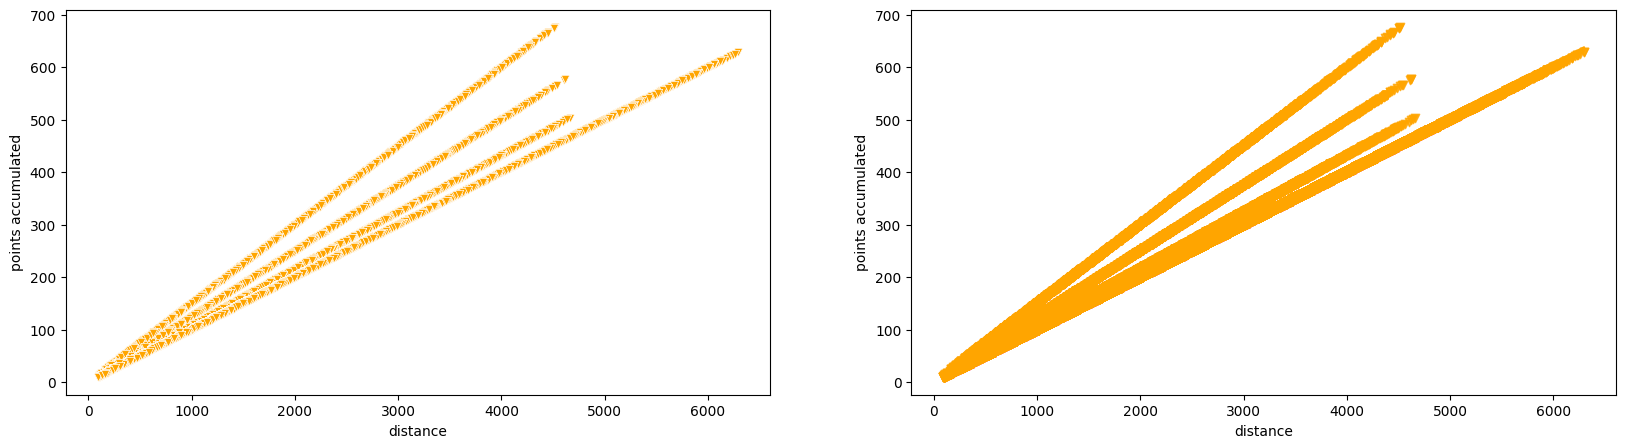

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.scatterplot(x='distance',
                y= 'points accumulated',
                data = df_booked,
                marker='v',
                color = 'orange',
                ax=axes[0])

sns.regplot(x='distance',
                y= 'points accumulated',
                data = df_booked,
                marker='v',
                color = 'orange',
                ax=axes[1])

> Son proporcionales, aunque a diferentes escalas. Parece indicar que, según alguna subagrupación como puede ser el grado de loyalty, se otorgan diferentes puntos por distancia.

3. ¿Cuál es la distribución de los clientes por provincia o estado?


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'alberta'),
  Text(1, 0, 'ontario'),
  Text(2, 0, 'british columbia'),
  Text(3, 0, 'saskatchewan'),
  Text(4, 0, 'quebec'),
  Text(5, 0, 'newfoundland'),
  Text(6, 0, 'manitoba'),
  Text(7, 0, 'new brunswick'),
  Text(8, 0, 'nova scotia'),
  Text(9, 0, 'prince edward island'),
  Text(10, 0, 'yukon')])

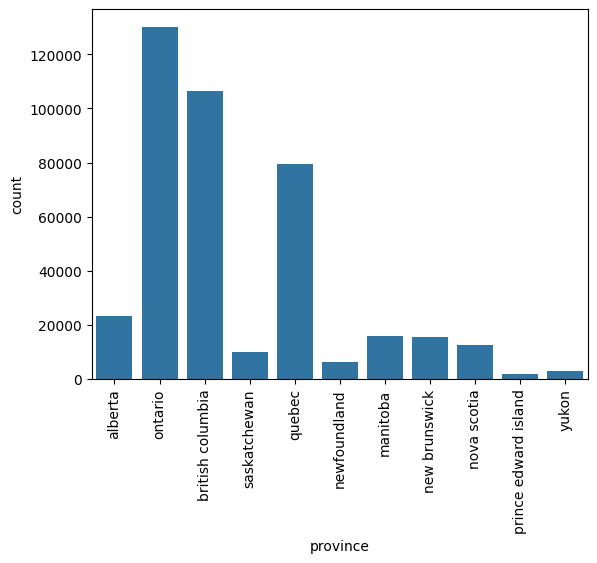

In [21]:
sns.countplot(x='province',
              data=df)
plt.xticks(rotation = 90)

In [22]:
for provincia in df['province'].unique():
    if provincia in ['ontario', 'british columbia', 'quebec']:
        print(f'Clientes de {provincia}:', (df['province'] == provincia).sum())


Clientes de ontario: 130258
Clientes de british columbia: 106442
Clientes de quebec: 79549


> Ontario parece ser la provincia donde hay mayor cantidad de afiliados a la aerolínea, con British Columbia y Quebec a una distancia considerable, pero aun así superior al resto de provincias. 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

<Axes: xlabel='salary', ylabel='education'>

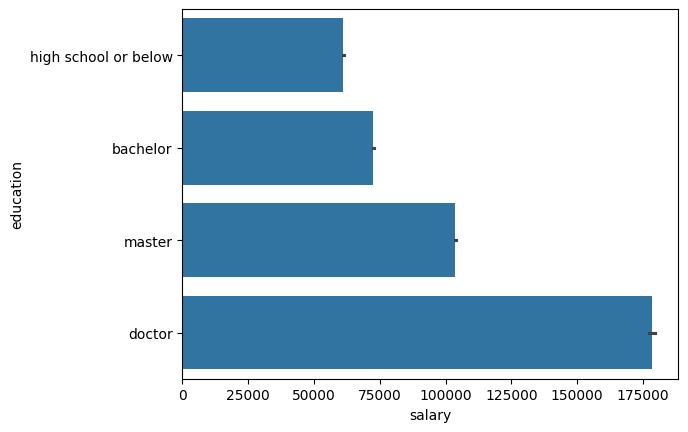

In [23]:
sns.barplot(y='education',
            x='salary',
            data=df[df['education']!='college'],
            order=['high school or below', 'bachelor', 'master', 'doctor'])

> tenemos también la categoría 'college', no obstante, no tenemos datos de salario de los usuarios pertenecientes a ese grupo. El salario aumenta en consonancia al nivel educativo; es decir, los de estudiantes de instituto los sueldos son más bajos que los de doctorados. Hay significativas diferencias en el promedio salarial entre bachelor y master, así como entre master y doctor. Podríamos asumir que los sueldos de college estarían entre high school y bachelor.

In [24]:
df.columns

Index(['loyalty number', 'year', 'month', 'flights booked',
       'flights with companions', 'total flights', 'distance',
       'points accumulated', 'points redeemed', 'dollar cost points redeemed',
       'country', 'province', 'city', 'postal code', 'gender', 'education',
       'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type',
       'enrollment year', 'enrollment month'],
      dtype='object')

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [54]:
df_pie = pd.DataFrame(df.groupby('loyalty card')['loyalty number'].count().reset_index())
df_pie

,loyalty card,loyalty number
0,aurora,83132
1,nova,136883
2,star,183721


([<matplotlib.patches.Wedge at 0x2418ab87ed0>,
 [Text(0.91766653141785, 0.693100380259261, 'aurora'),
  Text(-0.8153528007739611, 0.8109869359429025, 'nova'),
  Text(0.16184918398805825, -1.138553837832186, 'star')],
 [Text(1.037362165950613, 0.783504777684382, '20.6%'),
  Text(-0.9217031660923037, 0.9167678406311072, '33.9%'),
  Text(0.18295994711693542, -1.2870608601581233, '45.5%')])

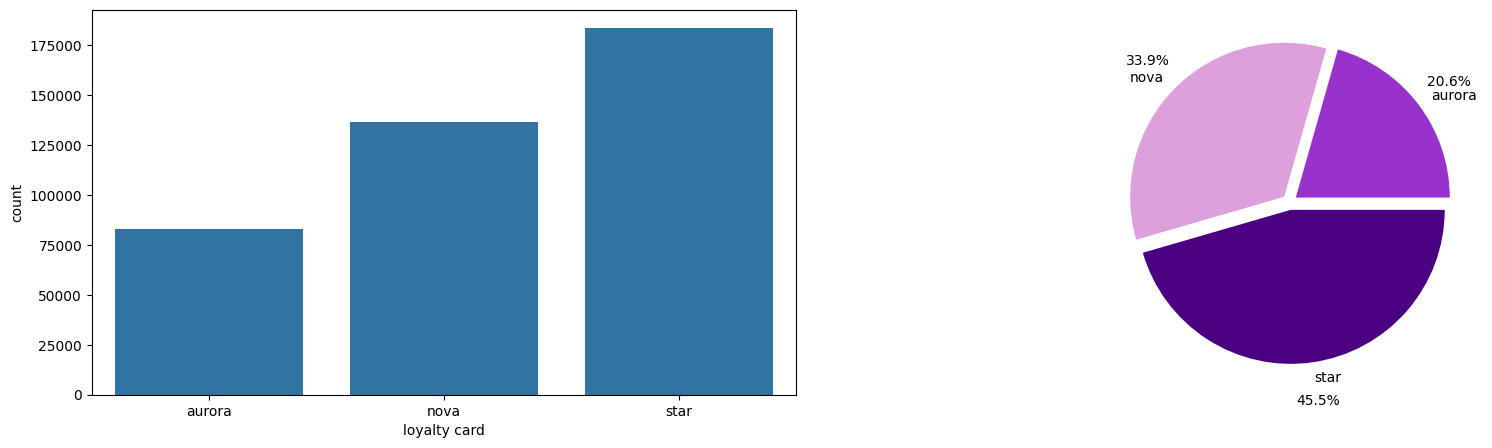

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.countplot(x='loyalty card',
            data=df,
            ax=axes[0])

plt.pie(x= df_pie['loyalty number'], 
       autopct='%1.1f%%',
       pctdistance=1.25,
       labels = df_pie['loyalty card'],
       explode = (0.05,0.05,0.05),
       colors = ['darkorchid', 'plum', 'indigo'])

> Star es la categoría que más clientes recoge. 

In [76]:
df_clientes = pd.DataFrame(df.groupby('loyalty card')[['points accumulated', 'total flights']].mean().reset_index())
df_clientes

,loyalty card,points accumulated,total flights
0,aurora,128.396688,5.190324
1,nova,123.983670,5.158909
2,star,122.609583,5.170704


In [78]:
df_clientes2 = pd.DataFrame(df_booked.groupby('loyalty card')[['points accumulated', 'total flights']].mean().reset_index())
df_clientes2

,loyalty card,points accumulated,total flights
0,aurora,249.116006,10.070297
1,nova,242.093760,10.073422
2,star,237.929286,10.033979


Text(0.5, 1.0, 'Relación total de vuelos tomados y loyalty card')

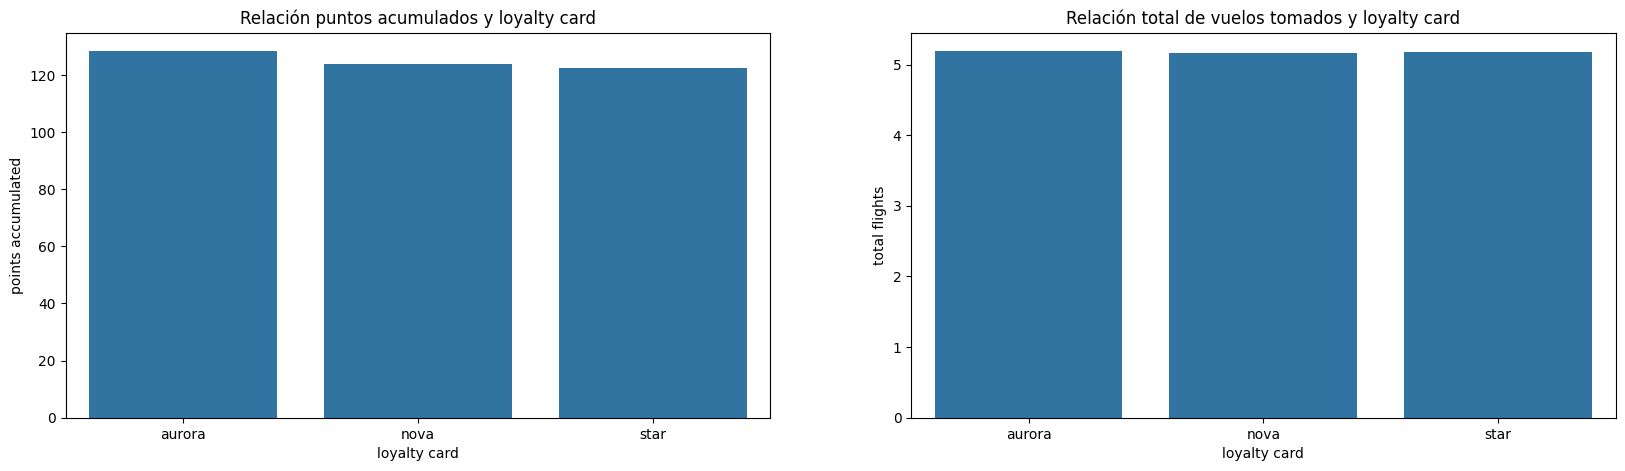

In [77]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.barplot(y='points accumulated',
            x= 'loyalty card',
            data=df_clientes,
            ax=axes[0])
axes[0].set_title('Relación puntos acumulados y loyalty card')


sns.barplot(y='total flights',
            x= 'loyalty card',
            data=df_clientes,
            ax=axes[1])

axes[1].set_title('Relación total de vuelos tomados y loyalty card')

> Sin emabrgo, no parece que el grupo de loyalty repercuta en el número de vuelos tomados o los puntos acumulados. 

> Aurora, pese a ser el que menos miembtos tiene, parece acumular más puntos. Como vimos que el número de puntos ganados no dependía únicamente de la distancia recorrida, aquí podemos considerar que la loyalty aurora otorga más puntos por distancia.

> Los afiliados de los tres grupos toman un número similar de vuelos

6. ¿Cómo se distribuyen los clientes según su estado civil y género?


<Axes: xlabel='marital status', ylabel='count'>

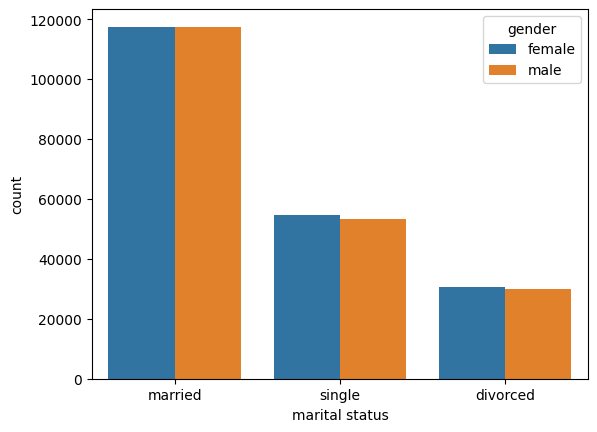

In [ ]:
sns.countplot(x='marital status',
              hue = 'gender',
              data = df)

> No podemos hablar de una diferencia significativa en cuanto a género según el estado civil